In [ ]:
import torch
from structure import Structure
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [8]:
s1z6m = Structure('1z6mA02', random_state=1)

In [9]:
o1 = s1z6m.optimize(10, lr=0.01)

Iteration: 000, Loss: 4742.681
181.66621851921082
Iteration: 001, Loss: 4712.896
173.4603021144867
Iteration: 002, Loss: 4611.644
175.3434863090515
Iteration: 003, Loss: 4591.660
174.00585293769836
Iteration: 004, Loss: 5573.309
174.43804335594177
Iteration: 005, Loss: 5493.647
174.7036108970642
Iteration: 006, Loss: 5491.166
174.9599325656891
Iteration: 007, Loss: 5477.189
174.68096113204956
Iteration: 008, Loss: 5467.017
174.59033727645874
Iteration: 009, Loss: 5460.705
174.82163548469543


In [2]:
torch.linspace(0.0001, 1, 10)

tensor([1.0000e-04, 1.1120e-01, 2.2230e-01, 3.3340e-01, 4.4450e-01, 5.5560e-01,
        6.6670e-01, 7.7780e-01, 8.8890e-01, 1.0000e+00])

In [2]:
s1z6m = Structure('1z6mA02', random_state=1)

In [3]:
o2 = s1z6m.optimize(5, lr=0.01, max_iter=50)

Iteration: 000, Loss: 4742.681
426.87176537513733
Iteration: 001, Loss: 4597.344
419.97548270225525
Iteration: 002, Loss: 5493.647
425.05376172065735
Iteration: 003, Loss: 5476.048
424.6372320652008
Iteration: 004, Loss: 5454.271


KeyboardInterrupt: 

In [4]:
s1z6m = Structure('1z6mA02', random_state=1, kappa=4)
o3 = s1z6m.optimize(10, lr=0.01)

Iteration: 000, Loss: 6582.436
166.82415914535522
Iteration: 001, Loss: 6570.300


KeyboardInterrupt: 

## Try several learning rates - 100 iterations

In [6]:
for lr in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]:
    os.system(f'python3 lbfgs_optimize.py -d 1z6mA02 -n 1 -o ../../steps/folded_structures/lbfgs -i 100 -lr {lr}')

In [4]:
ls ../../steps/folded_structures/lbfgs/temp_1z6mA02/

1z6mA02_0_0.0001.sh  1z6mA02_0_0.005.sh  1z6mA02_0_0.1.sh
1z6mA02_0_0.0005.sh  1z6mA02_0_0.01.sh   1z6mA02_0_0.5.sh
1z6mA02_0_0.001.sh   1z6mA02_0_0.05.sh   1z6mA02_0_1.0.sh


In [13]:
losses = {}
histories = {}
params = {}

for i, f in enumerate(os.listdir(f'../../steps/folded_structures/lbfgs/1z6mA02/')):
    if f != 'bin':
        d, rs, l = f.split('.p')[0].split('_')
        with open(f'../../steps/folded_structures/lbfgs/1z6mA02/{f}', 'rb') as s:
            temp = pickle.load(s)
            losses[i] = float(temp['loss'])
            histories[i] = np.array(temp['history'])
            params[i] = l 

losses = np.array(losses)

In [14]:
losses

array({0: 6190.60693359375, 1: 6303.142578125, 2: 6057.74755859375, 3: 5594.86376953125, 4: 5207.04248046875, 5: 5424.8984375, 6: 6343.015625, 7: 5881.0986328125, 8: 5295.13330078125},
      dtype=object)

IndexError: index 2 is out of bounds for axis 0 with size 2

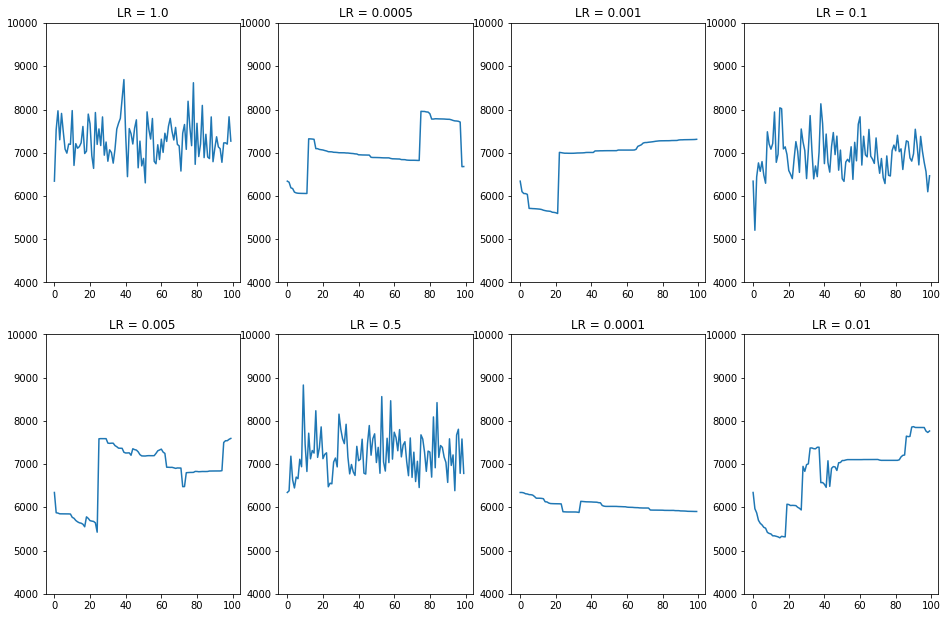

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(16, 7))

for i in range(2):
    for j in range(4):
        ind = i * 4 + j + 1
        ax[i, j].plot(histories[ind][:, 0], histories[ind][:, 1])
        l = params[ind]
        ax[i, j].set_title(f'LR = {l}')
        ax[i, j].set_ylim(4000, 10000)

for j in range(4):
    ax[2, j].set_xlabel('Iterations')
plt.tight_layout()

In [2]:
s1z6m = Structure('1z6mA02', random_state=1, angle_potential=False)
o1 = s1z6m.optimize(50, lr=0.001)

Iteration: 000, Loss: 4749.948
95.14350461959839
Iteration: 001, Loss: 4742.063
92.36467099189758
Iteration: 002, Loss: 4735.645
92.77054452896118
Iteration: 003, Loss: 4726.623
93.2596344947815
Iteration: 004, Loss: 4723.893
93.56567621231079
Iteration: 005, Loss: 4721.064
92.99509406089783
Iteration: 006, Loss: 4718.231
93.64051866531372
Iteration: 007, Loss: 4713.083
93.31216788291931
Iteration: 008, Loss: 4704.820
92.99388718605042
Iteration: 009, Loss: 4701.187
93.11691617965698
Iteration: 010, Loss: 4698.645
92.98254799842834
Iteration: 011, Loss: 4692.811
93.19305205345154
Iteration: 012, Loss: 4690.223
93.54843950271606
Iteration: 013, Loss: 4688.101
93.87943577766418
Iteration: 014, Loss: 4682.791
94.25734186172485
Iteration: 015, Loss: 4681.891
75.36324977874756
Iteration: 016, Loss: 4681.721
93.80361366271973
Iteration: 017, Loss: 4681.901
94.0645022392273
Iteration: 018, Loss: 4683.074
91.01930618286133
Iteration: 019, Loss: 4679.558
91.16293454170227
Iteration: 020, Loss: 

KeyboardInterrupt: 